# # Importing Libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning (Column By Column)

In [2]:
# importing file
df=pd.read_excel('training_data.xlsx')

In [3]:
df.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 91 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

In [5]:
# Removing unnamed columns
df = df.iloc[:,:55]
df.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

In [7]:
# checking values in mortality
df['Mortality'].unique()

array([0.28, 1, 0, 0.16, 0.15, 0.17, 0.04, 0.07, 0.06, 0.25, 0.64, 0.55,
       0.79, 0.01, 0.08, 0.22, 0.38, 0.11, 0.1, 0.03, 0.35, 0.67, 0.52,
       0.34, 0.45, 0.2, 0.05, 0.36, 0.23, 0.3, 0.09, 0.49, 0.02, 0.14,
       0.12, 0.21, 0.62, 0.48, 0.47, 0.54, 0.4, 0.63, 0.6, 0.51, 0.5,
       0.27, 0.56, 0.18, 0.29, 0.76, 0.19, 'na', 0.26, '0%%', 0.41, 0.7,
       0.66, 0.42, 0.9, 0.32, 0.39, 0.58], dtype=object)

In [8]:
# replacing defective values
df['Mortality']=df['Mortality'].replace('0%%',0)
df['Mortality']=df['Mortality'].replace('na',np.nan)
df['Mortality'].unique()


array([0.28, 1.  , 0.  , 0.16, 0.15, 0.17, 0.04, 0.07, 0.06, 0.25, 0.64,
       0.55, 0.79, 0.01, 0.08, 0.22, 0.38, 0.11, 0.1 , 0.03, 0.35, 0.67,
       0.52, 0.34, 0.45, 0.2 , 0.05, 0.36, 0.23, 0.3 , 0.09, 0.49, 0.02,
       0.14, 0.12, 0.21, 0.62, 0.48, 0.47, 0.54, 0.4 , 0.63, 0.6 , 0.51,
       0.5 , 0.27, 0.56, 0.18, 0.29, 0.76, 0.19,  nan, 0.26, 0.41, 0.7 ,
       0.66, 0.42, 0.9 , 0.32, 0.39, 0.58])

In [9]:
df['Mortality'].dtype

dtype('float64')

In [10]:
# checking for null values
df['Mortality'].isna().sum()

3

In [11]:
# removing null values
df = df.dropna(subset=['Mortality'])

In [12]:
df['Mortality'].unique()

array([0.28, 1.  , 0.  , 0.16, 0.15, 0.17, 0.04, 0.07, 0.06, 0.25, 0.64,
       0.55, 0.79, 0.01, 0.08, 0.22, 0.38, 0.11, 0.1 , 0.03, 0.35, 0.67,
       0.52, 0.34, 0.45, 0.2 , 0.05, 0.36, 0.23, 0.3 , 0.09, 0.49, 0.02,
       0.14, 0.12, 0.21, 0.62, 0.48, 0.47, 0.54, 0.4 , 0.63, 0.6 , 0.51,
       0.5 , 0.27, 0.56, 0.18, 0.29, 0.76, 0.19, 0.26, 0.41, 0.7 , 0.66,
       0.42, 0.9 , 0.32, 0.39, 0.58])

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mortality')

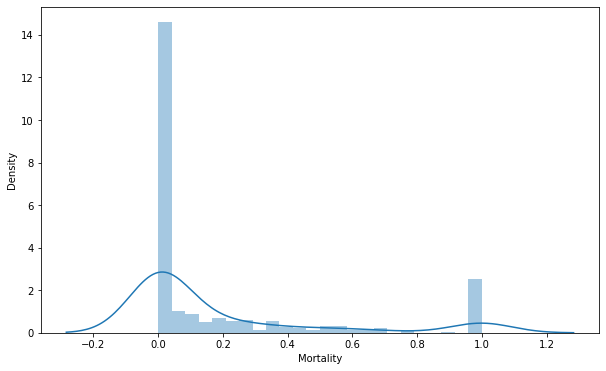

In [13]:
# ploting graph of Mortality
plt.figure(figsize=(10,6))
sns.distplot(df["Mortality"], bins=24)
plt.xlabel("Mortality")

In [14]:
df['Severity'].unique()

array(['All', 'Severe/Critical Only', 'Mild only', nan, 'Both', 'Mild',
       'Severe', 'Asymptomatic only', 'Severe/critical only'],
      dtype=object)

In [15]:
# correcting misspelled values and checking sum of null values
df['Severity']=df['Severity'].replace('Severe/Critical Only','Severe/critical only')
df['Severity'].isna().sum()

17

In [16]:
# droping null values
df = df.dropna(subset=['Severity'])
df['Severity'].unique()

array(['All', 'Severe/critical only', 'Mild only', 'Both', 'Mild',
       'Severe', 'Asymptomatic only'], dtype=object)

In [17]:
df.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,1,Severe/critical only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1.00
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0.00
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


In [18]:
df['Ventilation'].unique()

array(['Both', nan, 'Ventilation only', 'Non-ventilation only', 'ΝΑ',
       'Yes', 'No'], dtype=object)

In [19]:
# checking null values
df['Ventilation'].isna().sum()

159

In [20]:
# replacing null and 'NA' values
df['Ventilation']=df['Ventilation'].replace('ΝΑ','No')
df['Ventilation']=df['Ventilation'].replace(np.nan,'No')

df['Ventilation'].unique()

array(['Both', 'No', 'Ventilation only', 'Non-ventilation only', 'Yes'],
      dtype=object)

In [21]:
df['% Male'].unique()

array([0.623 , 0.7037, 0.5912, 0.603 , 0.616 , 0.59  , 0.52  , 0.27  ,
       0.67  , 0.47  , 0.544 , 0.29  , 0.4416, 0.404 , 0.55  , 0.833 ,
       0.864 , 0.786 , 0.706 , 0.4066,    nan, 0.565 , 0.576 , 0.552 ,
       0.4903, 0.438 , 0.588 , 0.526 , 0.454 , 0.66  , 0.581 , 0.582 ,
       0.578 , 0.672 , 0.575 , 0.73  , 0.85  , 0.68  , 0.4615, 0.625 ,
       0.543 , 0.611 , 0.77  , 0.49  , 0.534 , 0.547 , 0.525 , 0.53  ,
       0.8   , 0.417 , 0.687 , 0.677 , 0.5   , 0.58  , 0.33  , 0.7   ,
       0.637 , 0.714 , 0.647 , 0.455 , 0.485 , 0.468 , 0.65  , 0.48  ,
       0.    , 0.78  , 0.54  , 0.506 , 0.458 , 0.515 , 0.667 , 0.412 ,
       0.421 , 0.509 , 0.557 , 0.4167, 0.527 , 0.5142, 0.471 , 0.453 ,
       0.6732, 0.889 , 0.4781, 0.5454, 0.5402, 0.4388, 0.43  , 0.495 ,
       0.486 , 0.22  , 1.    , 0.6   , 0.5062, 0.493 , 0.6267, 0.3836,
       0.659 , 0.364 , 0.333 , 0.516 , 0.479 , 0.57  , 0.449 , 0.5946,
       0.38  , 0.56  , 0.622 , 0.5941, 0.507 , 0.463 , 0.569 , 0.6944,
      

In [22]:
# checking nulll values
df['% Male'].isna().sum()

40

In [23]:
# 
# df = df.dropna(subset=['% Male'])

In [24]:
df.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,1,Severe/critical only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1.00
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0.00
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


In [25]:
df['Mean Age'].unique()

array([         nan,  49.5       ,  44.9       ,  48.8       ,
        52.3       ,  45.11      ,  40.        ,  52.        ,
        45.        ,  69.        ,  69.4       ,  67.5       ,
        72.6       ,  80.        ,  41.        ,  39.        ,
        43.7       ,  41.8       ,  47.25      ,  44.48      ,
        35.96      ,  44.47      ,  60.09      ,  55.5       ,
        56.        ,  66.        ,  51.        ,  49.        ,
        45.1       ,  34.8       ,  49.4       ,  70.58      ,
        78.61      ,  66.16      ,  70.        ,  79.5       ,
        46.        ,  29.2       ,  33.4       ,  44.2       ,
        63.        ,  34.9       ,  46.65      ,  46.5       ,
        56.4       ,  42.9       ,  40.6       ,  53.        ,
        52.95      ,  65.1       ,  58.4       ,  45.8       ,
        50.3       ,  54.65      ,   0.56      ,  71.        ,
         6.        ,   3.39      ,  46.17      ,  65.        ,
        37.        ,  36.        ,  10.        ,  70.7 

In [26]:
df['Mean Age'].isna().sum()

209

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mean Age', ylabel='Density'>

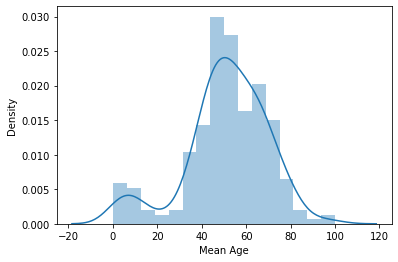

In [27]:
sns.distplot(df['Mean Age'])

In [28]:
df=df.drop(["Mean Age"],axis=1)

In [29]:
df.head()

,ID,Severity,Ventilation,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),...,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,...,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,1,Severe/critical only,Both,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,...,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1.00
2,1,All,Both,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,...,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0.00
3,2,All,Both,0.6030,NaN,NaN,0.1160,NaN,NaN,0.0300,...,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,2,All,Both,0.6160,NaN,NaN,0.1010,NaN,NaN,0.0510,...,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


In [30]:
df['Any Comorbidity'].unique()

array([0.476 , 0.6667, 0.4015,    nan, 0.26  , 0.27  , 0.24  , 0.3   ,
       0.2   , 0.349 , 0.312 , 0.246 , 0.5   , 0.988 , 0.323 , 0.394 ,
       0.241 , 0.1224, 0.125 , 0.1176, 0.32  , 0.38  , 0.29  , 0.33  ,
       0.464 , 0.722 , 0.373 , 0.22  , 0.319 , 0.163 , 0.7   , 0.18  ,
       0.4   , 0.083 , 0.86  , 0.28  , 0.08  , 0.67  , 0.982 , 0.529 ,
       0.364 , 0.361 , 0.167 , 0.288 , 0.    , 0.235 , 0.421 , 0.526 ,
       0.4428, 0.4043, 0.5028, 0.242 , 0.208 , 0.452 , 0.286 , 0.768 ,
       0.182 , 0.222 , 0.434 , 0.77  , 0.447 , 0.643 , 0.97  , 0.09  ,
       1.    , 0.82  , 0.85  , 0.73  , 0.537 , 0.793 , 0.1667, 0.5714,
       0.13  , 0.071 , 0.156 , 0.16  , 0.357 , 0.2735, 0.3378, 0.2652,
       0.41  , 0.389 , 0.571 , 0.0814, 0.1266, 0.531 , 0.556 , 0.458 ,
       0.47  , 0.35  , 0.2727, 0.3623, 0.957 , 0.6133, 0.68  , 0.34  ,
       0.39  , 0.61  , 0.72  , 0.81  , 0.7272, 0.205 , 0.265 , 0.294 ,
       0.25  , 0.1   , 0.5036, 0.299 , 0.719 , 0.707 , 0.734 , 0.388 ,
      

In [31]:
df['Any Comorbidity'].isna().sum()

242

In [32]:
df['Any Comorbidity']=df['Any Comorbidity'].replace(np.nan,0)
df['Any Comorbidity'].unique()

array([0.476 , 0.6667, 0.4015, 0.    , 0.26  , 0.27  , 0.24  , 0.3   ,
       0.2   , 0.349 , 0.312 , 0.246 , 0.5   , 0.988 , 0.323 , 0.394 ,
       0.241 , 0.1224, 0.125 , 0.1176, 0.32  , 0.38  , 0.29  , 0.33  ,
       0.464 , 0.722 , 0.373 , 0.22  , 0.319 , 0.163 , 0.7   , 0.18  ,
       0.4   , 0.083 , 0.86  , 0.28  , 0.08  , 0.67  , 0.982 , 0.529 ,
       0.364 , 0.361 , 0.167 , 0.288 , 0.235 , 0.421 , 0.526 , 0.4428,
       0.4043, 0.5028, 0.242 , 0.208 , 0.452 , 0.286 , 0.768 , 0.182 ,
       0.222 , 0.434 , 0.77  , 0.447 , 0.643 , 0.97  , 0.09  , 1.    ,
       0.82  , 0.85  , 0.73  , 0.537 , 0.793 , 0.1667, 0.5714, 0.13  ,
       0.071 , 0.156 , 0.16  , 0.357 , 0.2735, 0.3378, 0.2652, 0.41  ,
       0.389 , 0.571 , 0.0814, 0.1266, 0.531 , 0.556 , 0.458 , 0.47  ,
       0.35  , 0.2727, 0.3623, 0.957 , 0.6133, 0.68  , 0.34  , 0.39  ,
       0.61  , 0.72  , 0.81  , 0.7272, 0.205 , 0.265 , 0.294 , 0.25  ,
       0.1   , 0.5036, 0.299 , 0.719 , 0.707 , 0.734 , 0.388 , 0.477 ,
      

In [33]:
df.head()

,ID,Severity,Ventilation,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),...,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,...,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,1,Severe/critical only,Both,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,...,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1.00
2,1,All,Both,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,...,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0.00
3,2,All,Both,0.6030,0.0000,NaN,0.1160,NaN,NaN,0.0300,...,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,2,All,Both,0.6160,0.0000,NaN,0.1010,NaN,NaN,0.0510,...,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 474
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        455 non-null    int64  
 1   Severity                                  455 non-null    object 
 2   Ventilation                               455 non-null    object 
 3   % Male                                    415 non-null    float64
 4   Any Comorbidity                           455 non-null    float64
 5   Hypertension                              301 non-null    float64
 6   Diabetes                                  317 non-null    float64
 7   Cardiovascular Disease (incl. CAD)        289 non-null    float64
 8   Chronic obstructive lung (COPD)           251 non-null    float64
 9   Cancer (Any)                              229 non-null    float64
 10  Liver Disease (any)                   

In [35]:
df=df.drop(["Aspartate Aminotransferase (U/L)","Alanine Aminotransferase (U/L)","Albumin (g/L)","Hemoglobin (g/L) - UQ",
"Hemoglobin (g/L) - LQ","Hemoglobin (g/L) - Median",'White Blood Cell Count (10^9/L) - Median',
                 'White Blood Cell Count (10^9/L) - LQ','White Blood Cell Count (10^9/L) - UQ','Lymphocyte Count (10^9/L) - Median',
                 'Lymphocyte Count (10^9/L) - LQ','Lymphocyte Count (10^9/L) - UQ','Platelet Count (10^9/L) - Median',
                 'Platelet Count (10^9/L) - LQ','Platelet Count (10^9/L) - UQ','Shortness of Breath (dyspnoea)','Respiratory rate > 24 breaths per min','Max temperature (celsius)','Average temperature (celsius)','Disease Severity Asymptomatic','% Male'],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 474
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        455 non-null    int64  
 1   Severity                                  455 non-null    object 
 2   Ventilation                               455 non-null    object 
 3   Any Comorbidity                           455 non-null    float64
 4   Hypertension                              301 non-null    float64
 5   Diabetes                                  317 non-null    float64
 6   Cardiovascular Disease (incl. CAD)        289 non-null    float64
 7   Chronic obstructive lung (COPD)           251 non-null    float64
 8   Cancer (Any)                              229 non-null    float64
 9   Liver Disease (any)                       188 non-null    float64
 10  Cerebrovascular Disease               

In [37]:

df['Hypertension']=df['Hypertension'].replace(np.nan,0)

df['Diabetes']=df['Diabetes'].replace(np.nan,0)

df['Cardiovascular Disease (incl. CAD)']=df['Cardiovascular Disease (incl. CAD)'].replace(np.nan,0)

df['Chronic obstructive lung (COPD)']=df['Chronic obstructive lung (COPD)'].replace(np.nan,0)

df['Cancer (Any)']=df['Cancer (Any)'].replace(np.nan,0)

df['Liver Disease (any)']=df['Liver Disease (any)'].replace(np.nan,0)

df['Cerebrovascular Disease']=df['Cerebrovascular Disease'].replace(np.nan,0)

df['Chronic kidney/renal disease']=df['Chronic kidney/renal disease'].replace(np.nan,0)

df['Other']=df['Other'].replace(np.nan,0)


df['Fever (temperature ≥37·3°C)']=df['Fever (temperature ≥37·3°C)'].replace(np.nan,0)

df['Cough']=df['Cough'].replace(np.nan,0)

df['Headache']=df['Headache'].replace(np.nan,0)

df['Sputum (/Expectoration)']=df['Sputum (/Expectoration)'].replace(np.nan,0)

df['Myalgia (Muscle Pain)']=df['Myalgia (Muscle Pain)'].replace(np.nan,0)

df['Fatigue']=df['Fatigue'].replace(np.nan,0)

df['Diarrhoea']=df['Diarrhoea'].replace(np.nan,0)

df['Nausea or Vomiting']=df['Nausea or Vomiting'].replace(np.nan,0)

df['Loss of Appetite/Anorexia']=df['Loss of Appetite/Anorexia'].replace(np.nan,0)

df['Disease Severity Critical']=df['Disease Severity Critical'].replace(np.nan,0)

df['Disease Severity General']=df['Disease Severity General'].replace(np.nan,0)

df['Disease Severity Severe']=df['Disease Severity Severe'].replace(np.nan,0)

df['Antibiotic']=df['Antibiotic'].replace(np.nan,0)

df['Antiviral (Any)']=df['Antiviral (Any)'].replace(np.nan,0)

df['Heart failure']=df['Heart failure'].replace(np.nan,0)

df['Acute kidney injury (AKI)']=df['Acute kidney injury (AKI)'].replace(np.nan,0)

df['Secondary infection/ Bacterial infection']=df['Secondary infection/ Bacterial infection'].replace(np.nan,0)

df['ICU length of stay, days']=df['ICU length of stay, days'].replace(np.nan,0)
df['ICU length of stay, days']=df['ICU length of stay, days'].replace('na',0)

df['Hospital length of stay, days']=df['Hospital length of stay, days'].replace(np.nan,0)
df['Hospital length of stay, days']=df['Hospital length of stay, days'].replace('na',0)


In [38]:
df['ICU length of stay, days'].unique()

array([ 8.  ,  7.  , 10.  ,  6.  , 11.  ,  0.  ,  5.  ,  0.67,  2.  ,
       31.  ,  3.  ,  4.  ,  9.  ])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 474
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        455 non-null    int64  
 1   Severity                                  455 non-null    object 
 2   Ventilation                               455 non-null    object 
 3   Any Comorbidity                           455 non-null    float64
 4   Hypertension                              455 non-null    float64
 5   Diabetes                                  455 non-null    float64
 6   Cardiovascular Disease (incl. CAD)        455 non-null    float64
 7   Chronic obstructive lung (COPD)           455 non-null    float64
 8   Cancer (Any)                              455 non-null    float64
 9   Liver Disease (any)                       455 non-null    float64
 10  Cerebrovascular Disease               

In [40]:
df.head()

,ID,Severity,Ventilation,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),...,Disease Severity Severe,Disease Severity Critical,Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,0.0,...,0.3455,0.2775,0.9476,0.2147,0.2304,0.1466,0.1466,8.0,11.0,0.28
1,1,Severe/critical only,Both,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,0.0,...,0.2222,0.7778,0.9815,0.2222,0.5185,0.5000,0.5000,8.0,7.5,1.00
2,1,All,Both,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,0.0,...,0.3942,0.0803,0.9343,0.2117,0.1168,0.0073,0.0073,7.0,12.0,0.00
3,2,All,Both,0.0000,0.0000,0.1160,0.0000,0.0000,0.0300,0.0,...,0.0000,0.0000,0.9500,0.4700,0.0051,0.0468,0.0365,10.0,15.0,0.16
4,2,All,Both,0.0000,0.0000,0.1010,0.0000,0.0000,0.0510,0.0,...,0.0000,0.0000,0.9490,0.9490,0.0000,0.0320,0.0110,6.0,14.0,0.15


<AxesSubplot:>

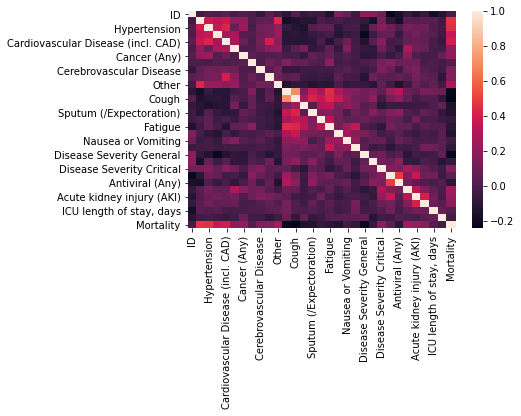

In [41]:
sns.heatmap(df.corr())

In [42]:
X=df.iloc[:,3:32]
y=df.iloc[:,-1]

In [43]:
X

,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,...,Disease Severity General,Disease Severity Severe,Disease Severity Critical,Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,0.0,0.000,0.0168,0.1200,...,0.3770,0.3455,0.2775,0.9476,0.2147,0.2304,0.1466,0.1466,8.0,11.0
1,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,0.0,0.000,0.0370,0.2037,...,0.0000,0.2222,0.7778,0.9815,0.2222,0.5185,0.5000,0.5000,8.0,7.5
2,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,0.0,0.000,0.0000,0.0803,...,0.5255,0.3942,0.0803,0.9343,0.2117,0.1168,0.0073,0.0073,7.0,12.0
3,0.0000,0.0000,0.1160,0.0000,0.0000,0.0300,0.0,0.065,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.9500,0.4700,0.0051,0.0468,0.0365,10.0,15.0
4,0.0000,0.0000,0.1010,0.0000,0.0000,0.0510,0.0,0.051,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.9490,0.9490,0.0000,0.0320,0.0110,6.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.0000,0.0960,0.0560,0.0320,0.0000,0.0080,0.0,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
470,0.0000,0.3880,0.1220,0.0920,0.0000,0.0410,0.0,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
472,0.7100,0.4336,0.2368,0.0702,0.0000,0.0000,0.0,0.000,0.0000,0.0000,...,0.0000,0.8200,0.1800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
473,0.7100,0.4600,0.2500,0.0900,0.0000,0.0000,0.0,0.000,0.0000,0.0000,...,0.0000,0.7400,0.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0


In [44]:
y

0      0.28
1      1.00
2      0.00
3      0.16
4      0.15
       ... 
469    0.39
470    0.56
472    1.00
473    0.00
474    0.00
Name: Mortality, Length: 455, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state=1)

In [46]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
lin = LinearRegression()

# fit the model to the training data (learn the coefficients)
lin.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lin.predict(X_test)

In [48]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

0.19304458058698523


In [49]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.27473820387267156


In [50]:
df2=pd.read_excel('test_data.xlsx')
df2.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,155,Mild only,Both,48.900000,0.3410,0.325,0.1510,0.1190,0.0630,NaN,...,NaN,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156,Severe/Critical Only,Both,NaN,0.7500,0.680,0.2500,0.1700,0.1100,0.1100,...,NaN,37.0,36.0,NaN,1.0,NaN,0.06,NaN,10.0,16.0
2,156,Severe/Critical Only,Ventilation only,NaN,0.7900,0.740,0.2600,0.2400,0.1800,0.1500,...,NaN,48.0,39.0,NaN,1.0,NaN,0.05,NaN,12.0,17.0
3,156,Severe/Critical Only,Non-ventilation only,NaN,0.6800,0.580,0.2100,0.0500,0.0000,0.0500,...,NaN,27.0,35.0,NaN,1.0,NaN,0.06,NaN,0.0,13.0
4,157,All,Both,52.943333,0.4654,NaN,0.2121,0.0938,0.0733,0.0327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        53 non-null     int64  
 1   Severity                                  53 non-null     object 
 2   Ventilation                               46 non-null     object 
 3   Mean Age                                  36 non-null     float64
 4   % Male                                    45 non-null     float64
 5   Any Comorbidity                           14 non-null     float64
 6   Hypertension                              26 non-null     float64
 7   Diabetes                                  30 non-null     float64
 8   Cardiovascular Disease (incl. CAD)        35 non-null     float64
 9   Chronic obstructive lung (COPD)           24 non-null     float64
 10  Cancer (Any)                            

In [52]:
df2['Severity'].unique()

array(['Mild only', 'Severe/Critical Only', 'All', 'Mild Only', 'Both',
       'Severe/critical only'], dtype=object)

In [53]:
df2['Severity']=df2['Severity'].replace('Severe/Critical Only','Severe/critical only')
df2['Severity'].isna().sum()

0

In [54]:
df2 = df2.dropna(subset=['Severity'])
df2['Severity'].unique()

array(['Mild only', 'Severe/critical only', 'All', 'Mild Only', 'Both'],
      dtype=object)

In [55]:
df2['Ventilation'].unique()

array(['Both', 'Ventilation only', 'Non-ventilation only', nan],
      dtype=object)

In [56]:
df2['Ventilation'].isna().sum()

7

In [57]:
df2['Ventilation']=df2['Ventilation'].replace('ΝΑ','No')
df2['Ventilation']=df2['Ventilation'].replace(np.nan,'No')

df2['Ventilation'].unique()

array(['Both', 'Ventilation only', 'Non-ventilation only', 'No'],
      dtype=object)

In [58]:
df2['% Male'].unique()

array([0.341 , 0.75  , 0.79  , 0.68  , 0.4654, 0.2927, 0.4938, 0.6098,
       0.5198, 0.588 , 0.375 , 0.47  , 0.44  , 0.6   , 0.568 , 0.64  ,
       0.55  , 1.    , 0.    ,    nan, 0.62  , 0.73  , 0.474 , 0.466 ,
       0.486 , 0.49  , 0.468 , 0.625 , 0.5017, 0.52  , 0.529 , 0.494 ,
       0.692 , 0.844 , 0.644 , 0.6226, 0.514 , 0.606 , 0.708 , 0.555 ,
       0.566 , 0.603 ])

In [59]:
df2['% Male'].isna().sum()

8

In [60]:
# df2 = df2.dropna(subset=['% Male'])

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mean Age', ylabel='Density'>

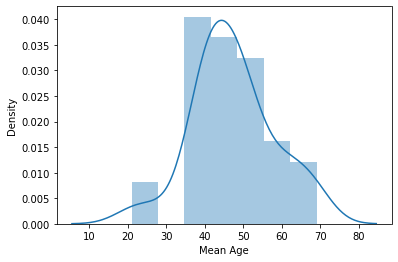

In [61]:
sns.distplot(df2['Mean Age'])

In [62]:
df2=df2.drop(["Mean Age"],axis=1)

In [63]:
df2.head()

,ID,Severity,Ventilation,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),...,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,155,Mild only,Both,0.3410,0.325,0.1510,0.1190,0.0630,NaN,0.0630,...,NaN,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156,Severe/critical only,Both,0.7500,0.680,0.2500,0.1700,0.1100,0.1100,NaN,...,NaN,37.0,36.0,NaN,1.0,NaN,0.06,NaN,10.0,16.0
2,156,Severe/critical only,Ventilation only,0.7900,0.740,0.2600,0.2400,0.1800,0.1500,NaN,...,NaN,48.0,39.0,NaN,1.0,NaN,0.05,NaN,12.0,17.0
3,156,Severe/critical only,Non-ventilation only,0.6800,0.580,0.2100,0.0500,0.0000,0.0500,NaN,...,NaN,27.0,35.0,NaN,1.0,NaN,0.06,NaN,0.0,13.0
4,157,All,Both,0.4654,NaN,0.2121,0.0938,0.0733,0.0327,0.0366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df2['Any Comorbidity'].unique()

array([0.325 , 0.68  , 0.74  , 0.58  ,    nan, 0.272 , 0.    , 0.49  ,
       0.63  , 0.39  , 0.527 , 0.489 , 0.75  , 0.9914, 0.52  ])

In [65]:
df2['Any Comorbidity'].isna().sum()

39

In [66]:
df2['Any Comorbidity']=df2['Any Comorbidity'].replace(np.nan,0)
df2['Any Comorbidity'].unique()

array([0.325 , 0.68  , 0.74  , 0.58  , 0.    , 0.272 , 0.49  , 0.63  ,
       0.39  , 0.527 , 0.489 , 0.75  , 0.9914, 0.52  ])

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        53 non-null     int64  
 1   Severity                                  53 non-null     object 
 2   Ventilation                               53 non-null     object 
 3   % Male                                    45 non-null     float64
 4   Any Comorbidity                           53 non-null     float64
 5   Hypertension                              26 non-null     float64
 6   Diabetes                                  30 non-null     float64
 7   Cardiovascular Disease (incl. CAD)        35 non-null     float64
 8   Chronic obstructive lung (COPD)           24 non-null     float64
 9   Cancer (Any)                              25 non-null     float64
 10  Liver Disease (any)                     

In [68]:
df2=df2.drop(["Aspartate Aminotransferase (U/L)","Alanine Aminotransferase (U/L)","Albumin (g/L)","Hemoglobin (g/L) - UQ",
"Hemoglobin (g/L) - LQ","Hemoglobin (g/L) - Median",'White Blood Cell Count (10^9/L) - Median',
                 'White Blood Cell Count (10^9/L) - LQ','White Blood Cell Count (10^9/L) - UQ','Lymphocyte Count (10^9/L) - Median',
                 'Lymphocyte Count (10^9/L) - LQ','Lymphocyte Count (10^9/L) - UQ','Platelet Count (10^9/L) - Median',
                 'Platelet Count (10^9/L) - LQ','Platelet Count (10^9/L) - UQ','Shortness of Breath (dyspnoea)','Respiratory rate > 24 breaths per min','Max temperature (celsius)','Average temperature (celsius)','Disease Severity Asymptomatic','% Male'],axis=1)

In [69]:

df2['Hypertension']=df2['Hypertension'].replace(np.nan,0)

df2['Diabetes']=df2['Diabetes'].replace(np.nan,0)

df2['Cardiovascular Disease (incl. CAD)']=df2['Cardiovascular Disease (incl. CAD)'].replace(np.nan,0)

df2['Chronic obstructive lung (COPD)']=df2['Chronic obstructive lung (COPD)'].replace(np.nan,0)

df2['Cancer (Any)']=df2['Cancer (Any)'].replace(np.nan,0)

df2['Liver Disease (any)']=df2['Liver Disease (any)'].replace(np.nan,0)

df2['Cerebrovascular Disease']=df2['Cerebrovascular Disease'].replace(np.nan,0)

df2['Chronic kidney/renal disease']=df2['Chronic kidney/renal disease'].replace(np.nan,0)

df2['Other']=df2['Other'].replace(np.nan,0)


df2['Fever (temperature ≥37·3°C)']=df2['Fever (temperature ≥37·3°C)'].replace(np.nan,0)

df2['Cough']=df2['Cough'].replace(np.nan,0)

df2['Headache']=df2['Headache'].replace(np.nan,0)

df2['Sputum (/Expectoration)']=df2['Sputum (/Expectoration)'].replace(np.nan,0)

df2['Myalgia (Muscle Pain)']=df2['Myalgia (Muscle Pain)'].replace(np.nan,0)

df2['Fatigue']=df2['Fatigue'].replace(np.nan,0)

df2['Diarrhoea']=df2['Diarrhoea'].replace(np.nan,0)

df2['Nausea or Vomiting']=df2['Nausea or Vomiting'].replace(np.nan,0)

df2['Loss of Appetite/Anorexia']=df2['Loss of Appetite/Anorexia'].replace(np.nan,0)

df2['Disease Severity Critical']=df2['Disease Severity Critical'].replace(np.nan,0)

df2['Disease Severity General']=df2['Disease Severity General'].replace(np.nan,0)

df2['Disease Severity Severe']=df2['Disease Severity Severe'].replace(np.nan,0)

df2['Antibiotic']=df2['Antibiotic'].replace(np.nan,0)

df2['Antiviral (Any)']=df2['Antiviral (Any)'].replace(np.nan,0)

df2['Heart failure']=df2['Heart failure'].replace(np.nan,0)

df2['Acute kidney injury (AKI)']=df2['Acute kidney injury (AKI)'].replace(np.nan,0)

df2['Secondary infection/ Bacterial infection']=df2['Secondary infection/ Bacterial infection'].replace(np.nan,0)

df2['ICU length of stay, days']=df2['ICU length of stay, days'].replace(np.nan,0)
df2['ICU length of stay, days']=df2['ICU length of stay, days'].replace('na',0)

df2['Hospital length of stay, days']=df2['Hospital length of stay, days'].replace(np.nan,0)
df2['Hospital length of stay, days']=df2['Hospital length of stay, days'].replace('na',0)

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        53 non-null     int64  
 1   Severity                                  53 non-null     object 
 2   Ventilation                               53 non-null     object 
 3   Any Comorbidity                           53 non-null     float64
 4   Hypertension                              53 non-null     float64
 5   Diabetes                                  53 non-null     float64
 6   Cardiovascular Disease (incl. CAD)        53 non-null     float64
 7   Chronic obstructive lung (COPD)           53 non-null     float64
 8   Cancer (Any)                              53 non-null     float64
 9   Liver Disease (any)                       53 non-null     float64
 10  Cerebrovascular Disease                 

In [71]:
df2.head()

,ID,Severity,Ventilation,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),...,Disease Severity General,Disease Severity Severe,Disease Severity Critical,Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,155,Mild only,Both,0.325,0.1510,0.1190,0.0630,0.0000,0.0630,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,156,Severe/critical only,Both,0.680,0.2500,0.1700,0.1100,0.1100,0.0000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.06,0.0,10.0,16.0
2,156,Severe/critical only,Ventilation only,0.740,0.2600,0.2400,0.1800,0.1500,0.0000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.05,0.0,12.0,17.0
3,156,Severe/critical only,Non-ventilation only,0.580,0.2100,0.0500,0.0000,0.0500,0.0000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.06,0.0,0.0,13.0
4,157,All,Both,0.000,0.2121,0.0938,0.0733,0.0327,0.0366,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


<AxesSubplot:>

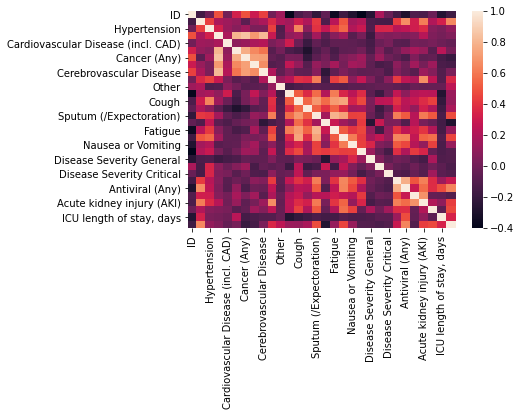

In [72]:
sns.heatmap(df2.corr())

In [73]:
t=df2.iloc[:,3:]
t

,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,...,Disease Severity General,Disease Severity Severe,Disease Severity Critical,Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,0.3250,0.1510,0.1190,0.0630,0.0000,0.0630,0.0000,0.0000,0.032,0.000,...,1.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
1,0.6800,0.2500,0.1700,0.1100,0.1100,0.0000,0.0000,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,1.000,0.000,0.060,0.000,10.0,16.0
2,0.7400,0.2600,0.2400,0.1800,0.1500,0.0000,0.0000,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,1.000,0.000,0.050,0.000,12.0,17.0
3,0.5800,0.2100,0.0500,0.0000,0.0500,0.0000,0.0000,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,1.000,0.000,0.060,0.000,0.0,13.0
4,0.0000,0.2121,0.0938,0.0733,0.0327,0.0366,0.0300,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
5,0.0000,0.1341,0.0610,0.0610,0.0244,0.0244,0.0000,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
6,0.0000,0.1728,0.0741,0.0370,0.0494,0.0123,0.0370,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
7,0.0000,0.3293,0.1463,0.1220,0.0244,0.0732,0.0488,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,11.5


In [74]:
y_final_pred=lin.predict(t)

In [75]:
df2['Mortality']=y_final_pred

In [76]:
df2['ID'].unique()

array([155, 156, 157, 158, 159, 160, 161, 162, 169, 170, 171, 172, 173,
       175, 176, 177, 181, 182], dtype=int64)

In [77]:
df2['Mortality'].unique()

array([ 0.0491675 ,  0.25926782,  0.28231087,  0.24445701,  0.0359514 ,
        0.04325537,  0.01190177,  0.05322505,  0.07977903,  0.07642459,
        0.07700797,  0.01566355, -0.01752633,  0.22732909,  0.13249873,
        0.12329471,  0.04285056,  0.31180664,  0.06536952,  0.10304966,
        0.37566843,  0.66489482,  0.14726122,  0.06787328,  0.07426239,
        0.07823069,  0.22101975,  0.20103865,  0.33684604,  0.09178428,
        0.09259613,  0.08887751,  0.0848131 ,  0.09777949,  0.09497344,
        0.0943871 ,  0.59386896,  0.30737007,  0.19784756,  0.25686942,
        0.16950114,  0.05233038,  0.13372814,  0.15556057,  0.11251044,
        0.13550016,  0.29597095])

In [78]:
df2.head()

,ID,Severity,Ventilation,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),...,Disease Severity Severe,Disease Severity Critical,Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,155,Mild only,Both,0.325,0.1510,0.1190,0.0630,0.0000,0.0630,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.049168
1,156,Severe/critical only,Both,0.680,0.2500,0.1700,0.1100,0.1100,0.0000,0.00,...,0.0,0.0,0.0,1.0,0.0,0.06,0.0,10.0,16.0,0.259268
2,156,Severe/critical only,Ventilation only,0.740,0.2600,0.2400,0.1800,0.1500,0.0000,0.00,...,0.0,0.0,0.0,1.0,0.0,0.05,0.0,12.0,17.0,0.282311
3,156,Severe/critical only,Non-ventilation only,0.580,0.2100,0.0500,0.0000,0.0500,0.0000,0.00,...,0.0,0.0,0.0,1.0,0.0,0.06,0.0,0.0,13.0,0.244457
4,157,All,Both,0.000,0.2121,0.0938,0.0733,0.0327,0.0366,0.03,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.035951


In [79]:
ps=pd.read_excel('sample_submission_mortality_rate.xlsx')
ps.head()

,ID,Mortality
0,155,1000
1,156,1000
2,156,1000
3,156,1000
4,157,1000


In [80]:
yt=pd.DataFrame(y_final_pred,columns = ['Mortality'])
yt.insert(0, column = "ID", value = df2['ID'])  

yt

,ID,Mortality
0,155,0.049168
1,156,0.259268
2,156,0.282311
3,156,0.244457
4,157,0.035951
5,157,0.043255
6,157,0.011902
7,157,0.053225
8,158,0.079779
9,158,0.076425


In [81]:
yt.to_csv("Final.csv")